In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('tcdml1920-rec-click-pred--training.csv')
cols_to_drop = ['user_id','session_id']
new_df = df[df.columns.drop(cols_to_drop)]
# print(new_df.head())

# new_df = new_df[(new_df['rec_processing_time']<38)]
new_df = new_df.replace('\\N',np.nan)
print(new_df.info())

all_columns = ['query_word_count','query_char_count',
                'hour_request_received','num_pubs_by_first_author','number_of_authors'] # Creates list of all column headers
new_df[all_columns] = new_df[all_columns].astype('float64')


# new_df = new_df[~new_df['time_recs_viewed'].isnull()]
print(new_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385687 entries, 0 to 385686
Data columns (total 44 columns):
recommendation_set_id               385687 non-null int64
query_identifier                    385533 non-null object
query_word_count                    385533 non-null object
query_char_count                    385533 non-null object
query_detected_language             382090 non-null object
query_document_id                   165217 non-null object
document_language_provided          4427 non-null object
year_published                      69977 non-null object
number_of_authors                   69275 non-null object
abstract_word_count                 146818 non-null object
abstract_char_count                 146818 non-null object
abstract_detected_language          146740 non-null object
first_author_id                     66456 non-null object
num_pubs_by_first_author            66456 non-null object
organization_id                     385687 non-null int64
application_

In [337]:
count_df = (new_df.groupby(['algorithm_class'])['set_clicked'].count()).reset_index()
count_df.sort_values("set_clicked", inplace=True, ascending=False)
count_df

,algorithm_class,set_clicked
0,content_based_filtering,8433
1,sentence_embeddings,3453
3,unknown,699
2,stereotype,562


In [11]:

df1 = new_df[new_df['organization_id']== 1]
print(df1.describe())
print(df1.isnull().sum())

       recommendation_set_id  query_word_count  query_char_count  \
count          270246.000000     270246.000000     270246.000000   
mean           220434.217435          8.918781         65.612794   
std            119920.678522          5.123981         36.382013   
min             46897.000000          0.000000          0.000000   
25%            117856.250000          5.000000         39.000000   
50%            199845.500000          8.000000         62.000000   
75%            330265.750000         12.000000         87.000000   
max            459534.000000        102.000000        512.000000   

       number_of_authors  num_pubs_by_first_author  organization_id  \
count       69275.000000              66456.000000         270246.0   
mean            3.678398               1357.603979              1.0   
std            14.078904              21695.231234              0.0   
min             1.000000                  1.000000              1.0   
25%             1.000000        

In [7]:
df2 = new_df[new_df['organization_id']== 4]
print(df2.describe())
print(df2.isnull().sum())

       recommendation_set_id  query_word_count  query_char_count  \
count          100215.000000     100075.000000     100075.000000   
mean           330519.482103         10.503023         69.483048   
std             60648.138182          2.223147         11.180615   
min            243679.000000          1.000000          9.000000   
25%            281446.500000          9.000000         62.000000   
50%            310453.000000         10.000000         68.000000   
75%            381467.500000         12.000000         76.000000   
max            459535.000000         46.000000        234.000000   

       number_of_authors  num_pubs_by_first_author  organization_id  \
count                0.0                       0.0         100215.0   
mean                 NaN                       NaN              4.0   
std                  NaN                       NaN              0.0   
min                  NaN                       NaN              4.0   
25%                  NaN        

In [8]:
df3 = new_df[new_df['organization_id']== 8]
print(df3.describe())
print(df3.isnull().sum())

       recommendation_set_id  query_word_count  query_char_count  \
count           15226.000000      15212.000000      15212.000000   
mean           394942.912846         15.587891        103.168354   
std             39350.228844          4.308523         27.283856   
min            326118.000000          2.000000         16.000000   
25%            359936.250000         13.000000         92.000000   
50%            396733.500000         16.000000        110.000000   
75%            429797.250000         19.000000        115.000000   
max            459536.000000         29.000000        207.000000   

       number_of_authors  num_pubs_by_first_author  organization_id  \
count                0.0                       0.0          15226.0   
mean                 NaN                       NaN              8.0   
std                  NaN                       NaN              0.0   
min                  NaN                       NaN              8.0   
25%                  NaN        

In [555]:
df4 = new_df[new_df['algorithm_class']== 'stereotype']
print(df4.describe())
print(df4.isnull().sum())

       recommendation_set_id  query_word_count  query_char_count  \
count             562.000000        561.000000        561.000000   
mean           400625.222420          9.966132         67.244207   
std             34855.710391          2.973201         17.560586   
min            326040.000000          1.000000          9.000000   
25%            376781.000000          9.000000         61.000000   
50%            401022.000000         10.000000         67.000000   
75%            431363.000000         11.000000         75.000000   
max            458868.000000         27.000000        177.000000   

       number_of_authors  num_pubs_by_first_author  organization_id  \
count           2.000000                  2.000000       562.000000   
mean            1.500000                 15.000000         3.973310   
std             0.707107                  2.828427         0.281958   
min             1.000000                 13.000000         1.000000   
25%             1.250000        

In [556]:
df = pd.read_csv('tcdml1920-rec-click-pred--training.csv')
cols_to_drop = ['user_id','session_id']
new_df = df[df.columns.drop(cols_to_drop)]
# print(new_df.head())

new_df = new_df[(new_df['rec_processing_time']<38)]
new_df = new_df.replace('\\N',np.nan)
print(new_df.info())

all_columns = ['query_word_count','query_char_count',
                'hour_request_received','num_pubs_by_first_author','number_of_authors'] # Creates list of all column headers
new_df[all_columns] = new_df[all_columns].astype('float64')
df5 = new_df[new_df['algorithm_class']== 'same_author']
print(df5.describe())
print(df5.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385445 entries, 0 to 385686
Data columns (total 44 columns):
recommendation_set_id               385445 non-null int64
query_identifier                    385291 non-null object
query_word_count                    385291 non-null object
query_char_count                    385291 non-null object
query_detected_language             381848 non-null object
query_document_id                   165156 non-null object
document_language_provided          4424 non-null object
year_published                      69920 non-null object
number_of_authors                   69216 non-null object
abstract_word_count                 146768 non-null object
abstract_char_count                 146768 non-null object
abstract_detected_language          146690 non-null object
first_author_id                     66398 non-null object
num_pubs_by_first_author            66398 non-null object
organization_id                     385445 non-null int64
application_

In [557]:

df6 = new_df[new_df['algorithm_class']== 'random']
print(df6.describe())
print(df6.isnull().sum())

       recommendation_set_id  query_word_count  query_char_count  \
count             324.000000        324.000000        324.000000   
mean            87948.401235          8.064815         60.345679   
std             13350.005419          4.299773         31.122314   
min             71312.000000          0.000000          0.000000   
25%             84072.000000          5.000000         38.500000   
50%             85971.000000          9.000000         64.000000   
75%             88110.000000         10.000000         82.000000   
max            190050.000000         28.000000        192.000000   

       number_of_authors  num_pubs_by_first_author  organization_id  \
count          91.000000                 85.000000            324.0   
mean            2.923077               5709.294118              1.0   
std             2.413991              49678.007411              0.0   
min             1.000000                  1.000000              1.0   
25%             1.000000        

In [13]:
new_df['app_version'].value_counts()

4.3.1                                                       242781
4.1                                                          10718
4                                                             6981
4.2                                                           5651
4.3                                                            905
5.0-dev                                                        626
*unknown*                                                      378
4.0.0-beta                                                     352
4.0-beta3                                                      344
5.0-alpha                                                      145
4.0.0-dev--snapshot--2017-03-24--iaas--2d55cda0c               100
4.0-beta2                                                       88
5.0-dev--snapshot--2018-07-19--master--9ae2b404e                59
4.0-dev                                                         39
5.0.0                                                         

In [20]:
test = pd.read_csv('tcdml1920-rec-click-pred--test.csv')
test = test.iloc[:9145,:]

cols_to_drop = ['user_id','session_id','clicks','ctr','set_clicked']
test = test[test.columns.drop(cols_to_drop)]
# print(test.head())
test = test.replace('\\N',np.nan)
# print(test.head())
all_columns = ['query_word_count','query_char_count',
                'hour_request_received','num_pubs_by_first_author','number_of_authors'] # Creates list of all column headers
test[all_columns] = test[all_columns].astype('float64')

test_df1 = test[test['organization_id']== 1]
test_df2 = test[test['organization_id']== 4]
test_df3 = test[test['organization_id']== 8]

print(test_df1.head())


   recommendation_set_id      query_identifier  query_word_count  \
0                46914.0  Withheld for privacy              18.0   
1                46961.0  Withheld for privacy               5.0   
2                47012.0  Withheld for privacy               8.0   
3                47181.0  Withheld for privacy               9.0   
4                47240.0  Withheld for privacy              10.0   

   query_char_count query_detected_language query_document_id  \
0             126.0                      en               NaN   
1              60.0                      en               NaN   
2              54.0                      en               NaN   
3              59.0                      en          11559885   
4              81.0                      en               NaN   

  document_language_provided year_published  number_of_authors  \
0                        NaN            NaN                NaN   
1                        NaN            NaN                NaN   
2 

In [77]:
test[test['algorithm_class']== 'content_based_filtering']['recommendation_set_id']

0        46914.0
1        46961.0
2        47012.0
3        47181.0
4        47240.0
5        47269.0
6        47271.0
7        47349.0
8        47380.0
9        47494.0
11       47535.0
12       47706.0
13       47853.0
14       47980.0
15       48114.0
16       48155.0
17       48198.0
18       48299.0
19       48305.0
20       48323.0
21       48361.0
22       48415.0
23       48431.0
24       48472.0
25       48520.0
26       48583.0
27       48628.0
28       48682.0
29       48726.0
30       48747.0
          ...   
9096    458300.0
9098    458395.0
9100    458423.0
9101    458425.0
9102    458447.0
9103    458453.0
9104    458461.0
9105    458468.0
9107    458537.0
9110    458598.0
9111    458613.0
9112    458636.0
9113    458677.0
9114    458696.0
9115    458707.0
9119    458875.0
9123    458970.0
9129    459169.0
9130    459195.0
9131    459217.0
9132    459248.0
9133    459286.0
9134    459288.0
9135    459291.0
9136    459294.0
9137    459307.0
9138    459313.0
9139    459363

In [21]:
df1=  df1[['query_word_count','query_char_count','query_detected_language',
                'application_type','item_type','hour_request_received','local_hour_of_request','country_by_ip','search_abstract','cbf_parser','app_lang','app_version','recommendation_algorithm_id_used',
                'clicks','ctr','set_clicked']]
test_df1 = test_df1[['query_word_count','query_char_count','query_detected_language',
                'application_type','item_type','hour_request_received','local_hour_of_request','country_by_ip','search_abstract','cbf_parser','app_lang','app_version','recommendation_algorithm_id_used']]

In [22]:
def featureEngineering(newdf):
    clean_df = newdf.copy()
#     clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
    clean_df['cbf_parser'].fillna('unknown', inplace=True)
    clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
    clean_df['app_version'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_version'].isnull()]
    clean_df['local_hour_of_request'].fillna(clean_df['local_hour_of_request'].mode()[0], inplace=True)
    clean_df[clean_df['local_hour_of_request'].isnull()]
    clean_df['recommendation_algorithm_id_used'].fillna('unknown', inplace=True)
    clean_df[clean_df['recommendation_algorithm_id_used'].isnull()]

    # Target Encoding
#     clean_df['query_identifier'] = clean_df['query_identifier'].map(clean_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(clean_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(clean_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(clean_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(clean_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(clean_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(clean_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(clean_df.groupby('application_type')['set_clicked'].mean())
#     clean_df['algorithm_class'] = clean_df['algorithm_class'].map(clean_df.groupby('algorithm_class')['set_clicked'].mean())
    clean_df['cbf_parser'] = clean_df['cbf_parser'].map(clean_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(clean_df.groupby('app_lang')['set_clicked'].mean())
    clean_df['app_version'] = clean_df['app_version'].map(clean_df.groupby('app_version')['set_clicked'].mean())
    clean_df['local_hour_of_request'] = clean_df['local_hour_of_request'].map(clean_df.groupby('local_hour_of_request')['set_clicked'].mean())
    clean_df['recommendation_algorithm_id_used'] = clean_df['recommendation_algorithm_id_used'].map(clean_df.groupby('recommendation_algorithm_id_used')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(clean_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
#     clean_df['organization_id'] = clean_df['organization_id'].map(clean_df.groupby('organization_id')['set_clicked'].mean())
#     clean_df = clean_df*1000
#     print(clean_df.head())
    return clean_df

In [34]:
import sklearn
x=df1.copy()
y=df1.iloc[:,-1].copy()
# print(x.head())
print(len(y))

from sklearn.model_selection import train_test_split
# x_0 = df1[df1['set_clicked']==0]
# print(len(x_0))
# y_0 = x_0.iloc[:,-1]
# print(len(y_0))
# x_1 = df1[df1['set_clicked']==1]
# y_1 = x_1.iloc[:,-1]

# x_train_0,x_test_0,y_train_0,y_test_0=train_test_split(x_0,y_0,test_size=.20,random_state=5)
# x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=.20,random_state=5)
# x_train = pd.concat([x_train_0,x_train_1])
# x_test = pd.concat([x_test_0,x_test_1])
# y_train = pd.concat([y_train_0,y_train_1])
# y_test = pd.concat([y_test_0,y_test_1])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5,stratify=y)

x_train_original = x_train.copy()
print(x_train_original.head())
x_train = featureEngineering(x_train).iloc[:,:-3]
x_test = featureEngineering(x_test).iloc[:,:-3]
print(x_train_original.head())
print(len(x_train))
print(len(y_train))
# print(x_train['query_identifi

270246
        query_word_count  query_char_count query_detected_language  \
260265               7.0              39.0                      en   
145125              16.0             134.0                      en   
67103                6.0              38.0                      en   
72717               11.0              77.0                      en   
310228               3.0              19.0                      pl   

       application_type             item_type  hour_request_received  \
260265  digital_library  academic_publication                   16.0   
145125  digital_library  academic_publication                   11.0   
67103   digital_library  academic_publication                    9.0   
72717   digital_library  academic_publication                    9.0   
310228  digital_library  academic_publication                   22.0   

       local_hour_of_request country_by_ip search_abstract   cbf_parser  \
260265                    16            DE             yes   edi

In [35]:
print(y_train.value_counts())
print(y_test.value_counts())

0    211759
1      4437
Name: set_clicked, dtype: int64
0    52941
1     1109
Name: set_clicked, dtype: int64


In [373]:
from sklearn.utils import resample
X = pd.concat([x_train, y_train], axis=1)
print(X.head())
# separate minority and majority classes
x_0 = X[X['set_clicked']==0]
x_1 = X[X['set_clicked']==1]

# upsample minority
# x_1_upsampled = resample(x_1,
#                           replace=True, # sample with replacement
#                           n_samples=len(x_0), # match number in majority class
#                           random_state=27) # reproducible results

x_0_downsampled = resample(x_0,
                                replace = False, # sample without replacement
                                n_samples = len(x_1), # match minority n
                                random_state = 27) # reproducible results

# combine majority and upsampled minority
# upsampled = pd.concat([x_0, x_1_upsampled])

downsampled = pd.concat([x_0_downsampled, x_1])

# check new class counts
print(downsampled['set_clicked'].value_counts())
# print(upsampled['set_clicked'].value_counts())
# print(upsampled.head())

# y_train = upsampled.iloc[:,-1]
# x_train = upsampled.iloc[:,:-1]

y_train = downsampled.iloc[:,-1]
x_train = downsampled.iloc[:,:-1]

print(x_train.head())

        query_identifier  query_word_count  query_char_count  \
362198          0.052632          0.041916          0.030303   
319466          0.142857          0.057958          0.034921   
311254          0.000000          0.057958          0.082524   
336311          0.000000          0.034188          0.000000   
359944          0.043165          0.057958          0.057307   

        query_detected_language  organization_id  application_type  item_type  \
362198                 0.052365         0.020825          0.020842   0.019781   
319466                 0.052365         0.069870          0.069886   0.060714   
311254                 0.052365         0.069870          0.069886   0.049408   
336311                 0.052365         0.020825          0.020842   0.019781   
359944                 0.052365         0.069870          0.069886   0.049408   

        hour_request_received  country_by_ip  search_abstract  cbf_parser  \
362198               0.061069       0.030612       

0.6279740980573543
0.053028162381086937
0.5076645626690712
0.027975155279503106


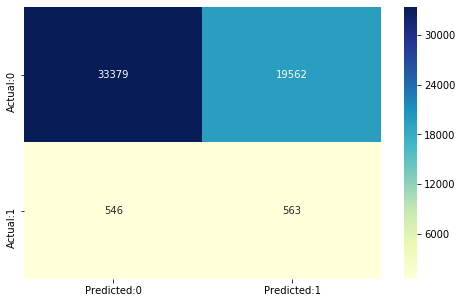

In [36]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)
smote = LogisticRegression(solver='liblinear').fit(x_train, y_train)

smote_pred = smote.predict(x_test)

# Checking accuracy
print(sklearn.metrics.accuracy_score(y_test, smote_pred))

# f1 score
print(sklearn.metrics.f1_score(y_test, smote_pred))

print(sklearn.metrics.recall_score(y_test, smote_pred))
print(sklearn.metrics.precision_score(y_test,smote_pred))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,smote_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

0.979463459759482
0.0
0.0
0.0


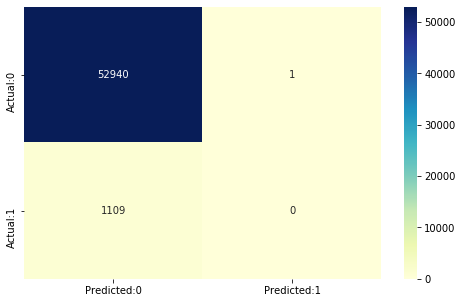

In [26]:
from sklearn.ensemble import RandomForestClassifier

# # train model
rfc = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)

print(sklearn.metrics.accuracy_score(y_test, rfc_pred))

print(sklearn.metrics.f1_score(y_test, rfc_pred))

print(sklearn.metrics.recall_score(y_test, rfc_pred))

print(sklearn.metrics.precision_score(y_test, rfc_pred))


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rfc_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

0.9795004625346901
0.0018018018018018016
0.0009017132551848512
1.0


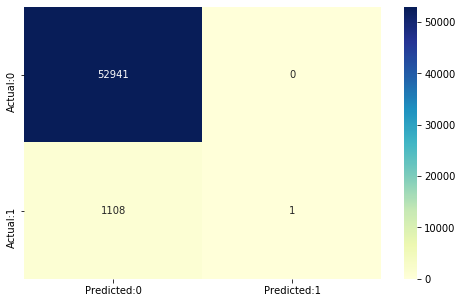

In [27]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

print(sklearn.metrics.accuracy_score(y_test,predictions))
print(sklearn.metrics.f1_score(y_test,predictions))
print(sklearn.metrics.recall_score(y_test,predictions))
print(sklearn.metrics.precision_score(y_test,predictions))


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

0.9841752891052952
0.6285714285714286
0.4943820224719101
0.8627450980392157


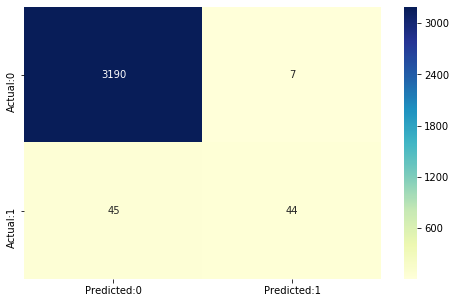

In [516]:
from sklearn.linear_model import LogisticRegression
# print(np.isfinite(x_test).sum())
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
# print(x_test)

print(sklearn.metrics.accuracy_score(y_test,y_pred))
print(sklearn.metrics.f1_score(y_test,y_pred))
print(sklearn.metrics.recall_score(y_test,y_pred))
print(sklearn.metrics.precision_score(y_test,y_pred))


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [18]:
pred_proba_df = pd.DataFrame(rfc.predict_proba(x_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = sklearn.metrics.f1_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))
    
# threshold = 0.35

# predicted_proba = rfc.predict_proba(x_test)
# predicted = (predicted_proba [:,1] >= threshold).astype('int')
# print(predicted)
# accuracy = sklearn.metrics.accuracy_score(y_test, predicted)
# print(accuracy)


******** For i = 0.05 ******
Our testing accuracy is 0.06439094502335609
[[40583 12358]
 [  661   448]]

******** For i = 0.1 ******
Our testing accuracy is 0.09309374323446634
[[49646  3295]
 [  894   215]]

******** For i = 0.15 ******
Our testing accuracy is 0.09082483781278962
[[51990   951]
 [ 1011    98]]

******** For i = 0.2 ******
Our testing accuracy is 0.06291834002677377
[[52603   338]
 [ 1062    47]]

******** For i = 0.25 ******
Our testing accuracy is 0.03785488958990537
[[52806   135]
 [ 1085    24]]

******** For i = 0.3 ******
Our testing accuracy is 0.017123287671232876
[[52892    49]
 [ 1099    10]]

******** For i = 0.35 ******
Our testing accuracy is 0.008826125330979701
[[52922    19]
 [ 1104     5]]

******** For i = 0.4 ******
Our testing accuracy is 0.0035746201966041103
[[52933     8]
 [ 1107     2]]

******** For i = 0.45 ******
Our testing accuracy is 0.0035906642728904844
[[52938     3]
 [ 1107     2]]

******** For i = 0.5 ******
Our testing accuracy is 

In [28]:

clean_df = test_df1.copy()

def featureEngineering(newdf):
    train_df = x_train_original.copy()
    clean_df = newdf.copy()
#     clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
    clean_df['cbf_parser'].fillna('unknown', inplace=True)
    clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
    clean_df['app_version'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_version'].isnull()]
    clean_df['local_hour_of_request'].fillna(clean_df['local_hour_of_request'].mode()[0], inplace=True)
    clean_df[clean_df['local_hour_of_request'].isnull()]
    clean_df['recommendation_algorithm_id_used'].fillna('unknown', inplace=True)
    clean_df[clean_df['recommendation_algorithm_id_used'].isnull()]

    # Target Encoding
#     clean_df['query_identifier'] = clean_df['query_identifier'].map(train_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(train_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(train_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(train_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(train_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(train_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(train_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(train_df.groupby('application_type')['set_clicked'].mean())
#     clean_df['algorithm_class'] = clean_df['algorithm_class'].map(train_df.groupby('algorithm_class')['set_clicked'].mean())
    clean_df['cbf_parser'] = clean_df['cbf_parser'].map(train_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(train_df.groupby('app_lang')['set_clicked'].mean())
    clean_df['app_version'] = clean_df['app_version'].map(train_df.groupby('app_version')['set_clicked'].mean())
    clean_df['local_hour_of_request'] = clean_df['local_hour_of_request'].map(train_df.groupby('local_hour_of_request')['set_clicked'].mean())
    clean_df['recommendation_algorithm_id_used'] = clean_df['recommendation_algorithm_id_used'].map(train_df.groupby('recommendation_algorithm_id_used')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(train_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
#     clean_df['organization_id'] = clean_df['organization_id'].map(train_df.groupby('organization_id')['set_clicked'].mean())
#     print(clean_df.head())

    clean_df.fillna(clean_df.mean(),inplace=True)
#     clean_df = clean_df*1000
    return clean_df

clean_df = featureEngineering(clean_df)


In [31]:
# answer_pred=rfc.predict(clean_df)
# print(answer_pred)

threshold = 0.1

predicted_proba = rfc.predict_proba(clean_df)
answer_pred = (predicted_proba [:,1] >= threshold).astype('int')
# print(answer_pred)


answer_pred = pd.DataFrame(answer_pred,
            columns=['set_clicked'])
print(answer_pred['set_clicked'].value_counts())
dd = test[test['organization_id']== 1][['recommendation_set_id']].reset_index(drop=True)
print(dd)
result1 = pd.concat([dd, answer_pred], axis=1)
# result.dropna(inplace=True)
print(result1)

0    4880
1     296
Name: set_clicked, dtype: int64
      recommendation_set_id
0                   46914.0
1                   46961.0
2                   47012.0
3                   47181.0
4                   47240.0
5                   47269.0
6                   47271.0
7                   47349.0
8                   47380.0
9                   47494.0
10                  47517.0
11                  47535.0
12                  47706.0
13                  47853.0
14                  47980.0
15                  48114.0
16                  48155.0
17                  48198.0
18                  48299.0
19                  48305.0
20                  48323.0
21                  48361.0
22                  48415.0
23                  48431.0
24                  48472.0
25                  48520.0
26                  48583.0
27                  48628.0
28                  48682.0
29                  48726.0
...                     ...
5146               456606.0
5147               45662

In [607]:
df2=  df2[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract','app_lang','app_version',
                'clicks','ctr','set_clicked']]

test_df2=  test_df2[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract','app_lang','app_version']]

In [608]:
def featureEngineering(newdf):
    clean_df = newdf.copy()
    clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
#     clean_df['cbf_parser'].fillna('unknown', inplace=True)
#     clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
    clean_df['app_version'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_version'].isnull()]

    # Target Encoding
    clean_df['query_identifier'] = clean_df['query_identifier'].map(clean_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(clean_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(clean_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(clean_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(clean_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(clean_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(clean_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(clean_df.groupby('application_type')['set_clicked'].mean())
    clean_df['algorithm_class'] = clean_df['algorithm_class'].map(clean_df.groupby('algorithm_class')['set_clicked'].mean())
#     clean_df['cbf_parser'] = clean_df['cbf_parser'].map(clean_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(clean_df.groupby('app_lang')['set_clicked'].mean())
    clean_df['app_version'] = clean_df['app_version'].map(clean_df.groupby('app_version')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(clean_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
    clean_df['organization_id'] = clean_df['organization_id'].map(clean_df.groupby('organization_id')['set_clicked'].mean())
#     print(clean_df.head())
    return clean_df

3453
                                         query_identifier  query_word_count  \
282418  Casio Keyboard CTK-471 Compatible Power Supply...               8.0   
300692  HP External hard drive Personal Media Drive HD...              13.0   
287074  Yamaha Keyboard YPT-210 Compatible Power Suppl...               8.0   
362682  Guest Lecture by Jorge Cardoso (Huawei): AIOps...              21.0   
256265  Roland Drum machine OCTAPAD PAD 8 Compatible P...              10.0   

        query_char_count query_detected_language  organization_id  \
282418              59.0                      en                4   
300692              87.0                      en                4   
287074              60.0                      en                4   
362682             150.0                      en                8   
256265              70.0                      en                4   

       application_type              item_type  hour_request_received  \
282418       e-commerce  Music m

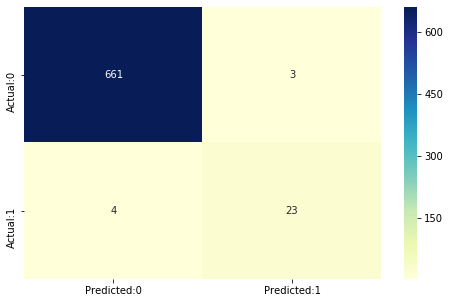

In [609]:
import sklearn
x=df2.copy()
y=df2.iloc[:,-1].copy()
# print(x.head())
print(len(y))

from sklearn.model_selection import train_test_split
# x_0 = df2[df2['set_clicked']==0]
# print(len(x_0))
# y_0 = x_0.iloc[:,-1]
# print(len(y_0))
# x_1 = df2[df2['set_clicked']==1]
# y_1 = x_1.iloc[:,-1]

# x_train_0,x_test_0,y_train_0,y_test_0=train_test_split(x_0,y_0,test_size=.20,random_state=5)
# x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=.20,random_state=5)
# x_train = pd.concat([x_train_0,x_train_1])
# x_test = pd.concat([x_test_0,x_test_1])
# y_train = pd.concat([y_train_0,y_train_1])
# y_test = pd.concat([y_test_0,y_test_1])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5,stratify=y)

x_train_original = x_train.copy()
print(x_train_original.head())
x_train = featureEngineering(x_train).iloc[:,:-3]
x_test = featureEngineering(x_test).iloc[:,:-3]
print(x_train_original.head())
print(len(x_train))
print(len(y_train))
# print(x_train['query_identifi

from sklearn.ensemble import RandomForestClassifier

# # train model
rfc = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)

print(sklearn.metrics.accuracy_score(y_test, rfc_pred))

print(sklearn.metrics.f1_score(y_test, rfc_pred))

print(sklearn.metrics.recall_score(y_test, rfc_pred))

print(sklearn.metrics.precision_score(y_test, rfc_pred))


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rfc_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# predictions = [round(value) for value in y_pred]

# print(sklearn.metrics.accuracy_score(y_test,predictions))
# print(sklearn.metrics.f1_score(y_test,predictions))
# print(sklearn.metrics.recall_score(y_test,predictions))
# print(sklearn.metrics.precision_score(y_test,predictions))


# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,predictions)
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# from sklearn.utils import resample
# X = pd.concat([x_train, y_train], axis=1)
# print(X.head())
# # separate minority and majority classes
# x_0 = X[X['set_clicked']==0]
# x_1 = X[X['set_clicked']==1]

# # upsample minority
# # x_1_upsampled = resample(x_1,
# #                           replace=True, # sample with replacement
# #                           n_samples=len(x_0), # match number in majority class
# #                           random_state=27) # reproducible results

# x_0_downsampled = resample(x_0,
#                                 replace = False, # sample without replacement
#                                 n_samples = len(x_1), # match minority n
#                                 random_state = 27) # reproducible results

# # combine majority and upsampled minority
# # upsampled = pd.concat([x_0, x_1_upsampled])

# downsampled = pd.concat([x_0_downsampled, x_1])

# # check new class counts
# print(downsampled['set_clicked'].value_counts())
# # print(upsampled['set_clicked'].value_counts())
# # print(upsampled.head())

# # y_train = upsampled.iloc[:,-1]
# # x_train = upsampled.iloc[:,:-1]

# y_train = downsampled.iloc[:,-1]
# x_train = downsampled.iloc[:,:-1]

# print(x_train.head())


# from sklearn.linear_model import LogisticRegression
# # print(np.isfinite(x_test).sum())
# logreg=LogisticRegression()
# logreg.fit(x_train,y_train)
# y_pred=logreg.predict(x_test)
# # print(x_test)

# print(sklearn.metrics.accuracy_score(y_test,y_pred))
# print(sklearn.metrics.f1_score(y_test,y_pred))
# print(sklearn.metrics.recall_score(y_test,y_pred))
# print(sklearn.metrics.precision_score(y_test,y_pred))

# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


In [610]:
pred_proba_df = pd.DataFrame(rfc.predict_proba(x_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = sklearn.metrics.f1_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.6206896551724138
[[631  33]
 [  0  27]]

******** For i = 0.1 ******
Our testing accuracy is 0.8125
[[653  11]
 [  1  26]]

******** For i = 0.15 ******
Our testing accuracy is 0.8524590163934426
[[656   8]
 [  1  26]]

******** For i = 0.2 ******
Our testing accuracy is 0.8813559322033898
[[658   6]
 [  1  26]]

******** For i = 0.25 ******
Our testing accuracy is 0.8620689655172414
[[658   6]
 [  2  25]]

******** For i = 0.3 ******
Our testing accuracy is 0.8620689655172414
[[658   6]
 [  2  25]]

******** For i = 0.35 ******
Our testing accuracy is 0.8620689655172414
[[658   6]
 [  2  25]]

******** For i = 0.4 ******
Our testing accuracy is 0.8571428571428572
[[659   5]
 [  3  24]]

******** For i = 0.45 ******
Our testing accuracy is 0.8888888888888888
[[661   3]
 [  3  24]]

******** For i = 0.5 ******
Our testing accuracy is 0.8679245283018868
[[661   3]
 [  4  23]]

******** For i = 0.55 ******
Our testing accuracy is 0.8

0.9874538745387453
0.7536231884057972
0.9285714285714286
0.6341463414634146


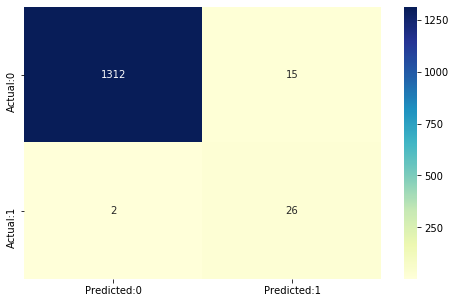

In [486]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)
smote = LogisticRegression(solver='liblinear').fit(x_train, y_train)

smote_pred = smote.predict(x_test)

# Checking accuracy
print(sklearn.metrics.accuracy_score(y_test, smote_pred))

# f1 score
print(sklearn.metrics.f1_score(y_test, smote_pred))

print(sklearn.metrics.recall_score(y_test, smote_pred))
print(sklearn.metrics.precision_score(y_test,smote_pred))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,smote_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [611]:

clean_df = test_df2.copy()

def featureEngineering(newdf):
    train_df = x_train_original.copy()
    clean_df = newdf.copy()
    clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
#     clean_df['cbf_parser'].fillna('unknown', inplace=True)
#     clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
    clean_df['app_version'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_version'].isnull()]

    # Target Encoding
    clean_df['query_identifier'] = clean_df['query_identifier'].map(train_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(train_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(train_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(train_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(train_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(train_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(train_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(train_df.groupby('application_type')['set_clicked'].mean())
    clean_df['algorithm_class'] = clean_df['algorithm_class'].map(train_df.groupby('algorithm_class')['set_clicked'].mean())
#     clean_df['cbf_parser'] = clean_df['cbf_parser'].map(train_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(train_df.groupby('app_lang')['set_clicked'].mean())
    clean_df['app_version'] = clean_df['app_version'].map(train_df.groupby('app_version')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(train_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
    clean_df['organization_id'] = clean_df['organization_id'].map(train_df.groupby('organization_id')['set_clicked'].mean())
#     print(clean_df.head())

    clean_df.fillna(clean_df.mean(),inplace=True)
    return clean_df

clean_df = featureEngineering(clean_df)


In [612]:
# answer_pred=smote.predict(clean_df)
# print(answer_pred)
threshold = 0.2

predicted_proba = rfc.predict_proba(clean_df)
answer_pred = (predicted_proba [:,1] >= threshold).astype('int')
print(answer_pred)

answer_pred = pd.DataFrame(answer_pred,
            columns=['set_clicked'])
print(answer_pred['set_clicked'].value_counts())
dd = test[test['algorithm_class']== 'sentence_embeddings'][['recommendation_set_id']].reset_index(drop=True)
print(dd)
print(answer_pred)
result2 = pd.concat([dd, answer_pred], axis=1)
# result.dropna(inplace=True)
print(result2)

[0 0 0 ... 0 0 0]
0    1925
1      37
Name: set_clicked, dtype: int64
      recommendation_set_id
0                  105533.0
1                  105690.0
2                  105898.0
3                  106693.0
4                  106891.0
5                  107214.0
6                  108300.0
7                  109626.0
8                  109959.0
9                  110884.0
10                 111114.0
11                 111560.0
12                 112034.0
13                 112296.0
14                 112438.0
15                 112455.0
16                 112473.0
17                 112474.0
18                 112674.0
19                 113101.0
20                 113637.0
21                 114293.0
22                 114309.0
23                 114357.0
24                 114642.0
25                 115070.0
26                 115130.0
27                 115197.0
28                 115976.0
29                 116015.0
...                     ...
1932               456427.0
1933  

In [641]:
df3=  df3[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract','app_lang',
                'clicks','ctr','set_clicked']]
test_df3=  test_df3[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract','app_lang',
               ]]

In [642]:
def featureEngineering(newdf):
    clean_df = newdf.copy()
    clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
#     clean_df['cbf_parser'].fillna('unknown', inplace=True)
#     clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
#     clean_df['app_version'].fillna('unknown', inplace=True)
#     clean_df[clean_df['app_version'].isnull()]

    # Target Encoding
    clean_df['query_identifier'] = clean_df['query_identifier'].map(clean_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(clean_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(clean_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(clean_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(clean_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(clean_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(clean_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(clean_df.groupby('application_type')['set_clicked'].mean())
    clean_df['algorithm_class'] = clean_df['algorithm_class'].map(clean_df.groupby('algorithm_class')['set_clicked'].mean())
#     clean_df['cbf_parser'] = clean_df['cbf_parser'].map(clean_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(clean_df.groupby('app_lang')['set_clicked'].mean())
#     clean_df['app_version'] = clean_df['app_version'].map(clean_df.groupby('app_version')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(clean_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
    clean_df['organization_id'] = clean_df['organization_id'].map(clean_df.groupby('organization_id')['set_clicked'].mean())
#     print(clean_df.head())
    return clean_df

699
                                         query_identifier  query_word_count  \
380695  A Stable Neural-Turing-Machine (NTM) Implement...              17.0   
385350  Comprehensive Comparison of Reference Managers...              15.0   
366745  Projects (Machine Learning, Recommender System...              12.0   
380140  5-way power splitter cable for Korg Volca by M...              14.0   
335455  Kodak Frame M820 Compatible Power Supply Plug ...               8.0   

        query_char_count query_detected_language  organization_id  \
380695             114.0                      en                8   
385350             113.0                      en                8   
366745              95.0                      en                8   
380140              86.0                      en                4   
335455              53.0                      en                4   

       application_type       item_type  hour_request_received country_by_ip  \
380695             blog   

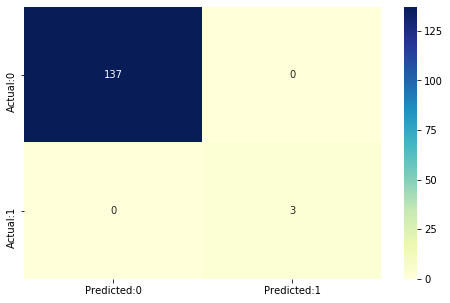

In [646]:
import sklearn
x=df3.copy()
y=df3.iloc[:,-1].copy()
# print(x.head())
print(len(y))

from sklearn.model_selection import train_test_split
# x_0 = df3[df3['set_clicked']==0]
# print(len(x_0))
# y_0 = x_0.iloc[:,-1]
# print(len(y_0))
# x_1 = df3[df3['set_clicked']==1]
# y_1 = x_1.iloc[:,-1]

# x_train_0,x_test_0,y_train_0,y_test_0=train_test_split(x_0,y_0,test_size=.40,random_state=5)
# x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=.20,random_state=5)
# x_train = pd.concat([x_train_0,x_train_1])
# x_test = pd.concat([x_test_0,x_test_1])
# y_train = pd.concat([y_train_0,y_train_1])
# y_test = pd.concat([y_test_0,y_test_1])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5,stratify=y)

x_train_original = x_train.copy()
print(x_train_original.head())
x_train = featureEngineering(x_train).iloc[:,:-3]
x_test = featureEngineering(x_test).iloc[:,:-3]
print(x_train_original.head())
print(len(x_train))
print(len(y_train))
# print(x_train['query_identifi

from sklearn.ensemble import RandomForestClassifier

# # train model
rfc = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)

# # predict on test set
rfc_pred = rfc.predict(x_test)

print(sklearn.metrics.accuracy_score(y_test, rfc_pred))

print(sklearn.metrics.f1_score(y_test, rfc_pred))

print(sklearn.metrics.recall_score(y_test, rfc_pred))

print(sklearn.metrics.precision_score(y_test, rfc_pred))



from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rfc_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# predictions = [round(value) for value in y_pred]

# print(sklearn.metrics.accuracy_score(y_test,predictions))
# print(sklearn.metrics.f1_score(y_test,predictions))
# print(sklearn.metrics.recall_score(y_test,predictions))
# print(sklearn.metrics.precision_score(y_test,predictions))


# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,predictions)
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# from sklearn.utils import resample
# X = pd.concat([x_train, y_train], axis=1)
# print(X.head())
# # separate minority and majority classes
# x_0 = X[X['set_clicked']==0]
# x_1 = X[X['set_clicked']==1]

# # upsample minority
# # x_1_upsampled = resample(x_1,
# #                           replace=True, # sample with replacement
# #                           n_samples=len(x_0), # match number in majority class
# #                           random_state=27) # reproducible results

# x_0_downsampled = resample(x_0,
#                                 replace = False, # sample without replacement
#                                 n_samples = len(x_1), # match minority n
#                                 random_state = 27) # reproducible results

# # combine majority and upsampled minority
# # upsampled = pd.concat([x_0, x_1_upsampled])

# downsampled = pd.concat([x_0_downsampled, x_1])

# # check new class counts
# print(downsampled['set_clicked'].value_counts())
# # print(upsampled['set_clicked'].value_counts())
# # print(upsampled.head())

# # y_train = upsampled.iloc[:,-1]
# # x_train = upsampled.iloc[:,:-1]

# y_train = downsampled.iloc[:,-1]
# x_train = downsampled.iloc[:,:-1]

# print(x_train.head())


# from sklearn.linear_model import LogisticRegression
# # print(np.isfinite(x_test).sum())
# logreg=LogisticRegression()
# logreg.fit(x_train,y_train)
# y_pred=logreg.predict(x_test)
# # print(x_test)

# print(sklearn.metrics.accuracy_score(y_test,y_pred))
# print(sklearn.metrics.f1_score(y_test,y_pred))
# print(sklearn.metrics.recall_score(y_test,y_pred))
# print(sklearn.metrics.precision_score(y_test,y_pred))

# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


In [647]:
pred_proba_df = pd.DataFrame(rfc.predict_proba(x_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = sklearn.metrics.f1_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))
    
print(y_train.value_counts())


******** For i = 0.05 ******
Our testing accuracy is 0.8571428571428571
[[136   1]
 [  0   3]]

******** For i = 0.1 ******
Our testing accuracy is 0.8571428571428571
[[136   1]
 [  0   3]]

******** For i = 0.15 ******
Our testing accuracy is 1.0
[[137   0]
 [  0   3]]

******** For i = 0.2 ******
Our testing accuracy is 1.0
[[137   0]
 [  0   3]]

******** For i = 0.25 ******
Our testing accuracy is 1.0
[[137   0]
 [  0   3]]

******** For i = 0.3 ******
Our testing accuracy is 1.0
[[137   0]
 [  0   3]]

******** For i = 0.35 ******
Our testing accuracy is 1.0
[[137   0]
 [  0   3]]

******** For i = 0.4 ******
Our testing accuracy is 1.0
[[137   0]
 [  0   3]]

******** For i = 0.45 ******
Our testing accuracy is 1.0
[[137   0]
 [  0   3]]

******** For i = 0.5 ******
Our testing accuracy is 1.0
[[137   0]
 [  0   3]]

******** For i = 0.55 ******
Our testing accuracy is 1.0
[[137   0]
 [  0   3]]

******** For i = 0.6 ******
Our testing accuracy is 1.0
[[137   0]
 [  0   3]]

***

0.9928571428571429
0.8571428571428571
1.0
0.75


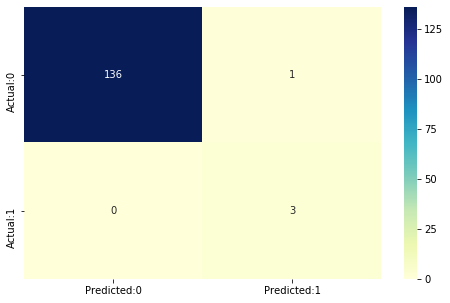

In [645]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)
smote = LogisticRegression(solver='liblinear').fit(x_train, y_train)

smote_pred = smote.predict(x_test)

# Checking accuracy
print(sklearn.metrics.accuracy_score(y_test, smote_pred))

# f1 score
print(sklearn.metrics.f1_score(y_test, smote_pred))

print(sklearn.metrics.recall_score(y_test, smote_pred))
print(sklearn.metrics.precision_score(y_test,smote_pred))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,smote_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [648]:

clean_df = test_df3.copy()

def featureEngineering(newdf):
    train_df = x_train_original.copy()
    clean_df = newdf.copy()
    clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
#     clean_df['cbf_parser'].fillna('unknown', inplace=True)
#     clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
#     clean_df['app_version'].fillna('unknown', inplace=True)
#     clean_df[clean_df['app_version'].isnull()]

    # Target Encoding
    clean_df['query_identifier'] = clean_df['query_identifier'].map(train_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(train_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(train_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(train_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(train_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(train_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(train_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(train_df.groupby('application_type')['set_clicked'].mean())
    clean_df['algorithm_class'] = clean_df['algorithm_class'].map(train_df.groupby('algorithm_class')['set_clicked'].mean())
#     clean_df['cbf_parser'] = clean_df['cbf_parser'].map(train_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(train_df.groupby('app_lang')['set_clicked'].mean())
#     clean_df['app_version'] = clean_df['app_version'].map(train_df.groupby('app_version')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(train_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
    clean_df['organization_id'] = clean_df['organization_id'].map(train_df.groupby('organization_id')['set_clicked'].mean())
#     print(clean_df.head())

    clean_df.fillna(clean_df.mean(),inplace=True)
    return clean_df

clean_df = featureEngineering(clean_df)


In [649]:
clean_df.head()

,query_identifier,query_word_count,query_char_count,query_detected_language,organization_id,application_type,item_type,hour_request_received,country_by_ip,algorithm_class,search_abstract,app_lang
164,0.0,0.028399,0.021449,0.025008,0.0,0.0,0.0,0.000000,0.000000,0.025045,0.025045,0.030534
473,0.0,0.037037,0.058824,0.025225,0.0,0.0,0.0,0.080000,0.000000,0.025045,0.025045,0.030534
474,0.0,0.000000,0.021449,0.025225,0.0,0.0,0.0,0.062500,0.000000,0.025045,0.025045,0.030534
475,0.0,0.028399,0.021449,0.025008,0.0,0.0,0.0,0.086957,0.029412,0.025045,0.025045,0.030534
478,0.0,0.028399,0.021449,0.025225,0.0,0.0,0.0,0.033333,0.029412,0.025045,0.025045,0.030534


In [650]:
# answer_pred=smote.predict(clean_df)
# print(answer_pred)

threshold = 0.3

predicted_proba = rfc.predict_proba(clean_df)
answer_pred = (predicted_proba [:,1] >= threshold).astype('int')
print(answer_pred)

answer_pred = pd.DataFrame(answer_pred,
            columns=['set_clicked'])
print(answer_pred['set_clicked'].value_counts())
dd = test[test['algorithm_class']== 'unknown'][['recommendation_set_id']].reset_index(drop=True)
print(dd)
result3 = pd.concat([dd, answer_pred], axis=1)
# result.dropna(inplace=True)
print(result3.describe())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0    402
1      5
Name: set_clicked, dtype: int64
     recommendation_set_id
0                  54992.0
1                  70930.0
2                  71038.0
3               

In [651]:
df4=  df4[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract','app_lang','app_version',
                'clicks','ctr','set_clicked']]
print(df4.head())
test_df4=  test_df4[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract','app_lang','app_version'
                ]]
print(test_df4.head())
def featureEngineering(newdf):
    clean_df = newdf.copy()
    clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
#     clean_df['cbf_parser'].fillna('unknown', inplace=True)
#     clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
    clean_df['app_version'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_version'].isnull()]

    # Target Encoding
    clean_df['query_identifier'] = clean_df['query_identifier'].map(clean_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(clean_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(clean_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(clean_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(clean_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(clean_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(clean_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(clean_df.groupby('application_type')['set_clicked'].mean())
    clean_df['algorithm_class'] = clean_df['algorithm_class'].map(clean_df.groupby('algorithm_class')['set_clicked'].mean())
#     clean_df['cbf_parser'] = clean_df['cbf_parser'].map(clean_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(clean_df.groupby('app_lang')['set_clicked'].mean())
    clean_df['app_version'] = clean_df['app_version'].map(clean_df.groupby('app_version')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(clean_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
    clean_df['organization_id'] = clean_df['organization_id'].map(clean_df.groupby('organization_id')['set_clicked'].mean())
#     print(clean_df.head())
    return clean_df


import sklearn
x=df4.copy()
y=df4.iloc[:,-1].copy()
# print(x.head())
print(len(y))

from sklearn.model_selection import train_test_split
# x_0 = df4[df4['set_clicked']==0]
# print(len(x_0))
# y_0 = x_0.iloc[:,-1]
# print(len(y_0))
# x_1 = df4[df4['set_clicked']==1]
# y_1 = x_1.iloc[:,-1]

# x_train_0,x_test_0,y_train_0,y_test_0=train_test_split(x_0,y_0,test_size=.20,random_state=5)
# x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=.20,random_state=5)

# print(x_train_0.head())
# print(x_train_1.head())

# x_train = pd.concat([x_train_0,x_train_1])
# x_test = pd.concat([x_test_0,x_test_1])
# y_train = pd.concat([y_train_0,y_train_1])
# y_test = pd.concat([y_test_0,y_test_1])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5,stratify=y)

x_train_original = x_train.copy()
print(x_train_original.head())
x_train = featureEngineering(x_train).iloc[:,:-3]
x_test = featureEngineering(x_test).iloc[:,:-3]
print(x_train_original.head())
print(len(x_train))
print(len(y_train))
# print(x_train['query_identifi

from sklearn.ensemble import RandomForestClassifier

# # train model
rfc = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)

print(sklearn.metrics.accuracy_score(y_test, rfc_pred))

print(sklearn.metrics.f1_score(y_test, rfc_pred))

print(sklearn.metrics.recall_score(y_test, rfc_pred))

print(sklearn.metrics.precision_score(y_test, rfc_pred))


# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,rfc_pred)
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# predictions = [round(value) for value in y_pred]

# print(sklearn.metrics.accuracy_score(y_test,predictions))
# print(sklearn.metrics.f1_score(y_test,predictions))
# print(sklearn.metrics.recall_score(y_test,predictions))
# print(sklearn.metrics.precision_score(y_test,predictions))


# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,predictions)
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# from sklearn.utils import resample
# X = pd.concat([x_train, y_train], axis=1)
# print(X.head())
# # separate minority and majority classes
# x_0 = X[X['set_clicked']==0]
# x_1 = X[X['set_clicked']==1]

# # upsample minority
# # x_1_upsampled = resample(x_1,
# #                           replace=True, # sample with replacement
# #                           n_samples=len(x_0), # match number in majority class
# #                           random_state=27) # reproducible results

# x_0_downsampled = resample(x_0,
#                                 replace = False, # sample without replacement
#                                 n_samples = len(x_1), # match minority n
#                                 random_state = 27) # reproducible results

# # combine majority and upsampled minority
# # upsampled = pd.concat([x_0, x_1_upsampled])

# downsampled = pd.concat([x_0_downsampled, x_1])

# # check new class counts
# print(downsampled['set_clicked'].value_counts())
# # print(upsampled['set_clicked'].value_counts())
# # print(upsampled.head())

# # y_train = upsampled.iloc[:,-1]
# # x_train = upsampled.iloc[:,:-1]

# y_train = downsampled.iloc[:,-1]
# x_train = downsampled.iloc[:,:-1]

# print(x_train.head())


# from sklearn.linear_model import LogisticRegression
# # print(np.isfinite(x_test).sum())
# logreg=LogisticRegression()
# logreg.fit(x_train,y_train)
# y_pred=logreg.predict(x_test)
# # print(x_test)

# print(sklearn.metrics.accuracy_score(y_test,y_pred))
# print(sklearn.metrics.f1_score(y_test,y_pred))
# print(sklearn.metrics.recall_score(y_test,y_pred))
# print(sklearn.metrics.precision_score(y_test,y_pred))

# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


                                         query_identifier  query_word_count  \
258410  Roku Media player 4230X Roku 3 Compatible Powe...              10.0   
258495  Yamaha Keyboard PSR-E223 Compatible Power Supp...               9.0   
258710  LaCie External hard drive Design by F.A. Porsc...              16.0   
259051  TC-Helicon Vocal effects VoiceLive 3 Extreme C...              11.0   
259187  Seagate External hard drive 2TB Expansion Desk...              12.0   

        query_char_count query_detected_language  organization_id  \
258410              67.0                      en                4   
258495              61.0                      en                4   
258710              97.0                      en                4   
259051              81.0                      en                4   
259187              86.0                      en                4   

       application_type              item_type  hour_request_received  \
258410       e-commerce     Home ente

In [502]:
print(x_train_original.head())

                                         query_identifier  query_word_count  \
370669  LaCie External hard drive D2 Big Disk V2 Compa...              13.0   
259051  TC-Helicon Vocal effects VoiceLive 3 Extreme C...              11.0   
330990  EarthQuaker Devices Effects pedal Palisades Co...              10.0   
261254  Kodak Digital camera V1073 Compatible Power Su...               9.0   
356028  Arturia Keyboard Keylab 49 Compatible Power Su...               8.0   

        query_char_count query_detected_language  organization_id  \
370669              77.0                      en                4   
259051              81.0                      en                4   
330990              80.0                      en                4   
261254              63.0                      en                4   
356028              63.0                      en                4   

       application_type              item_type  hour_request_received  \
370669       e-commerce      Hard dri

In [652]:
pred_proba_df = pd.DataFrame(rfc.predict_proba(x_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = sklearn.metrics.f1_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.6666666666666666
[[107   3]
 [  0   3]]

******** For i = 0.1 ******
Our testing accuracy is 0.8571428571428571
[[109   1]
 [  0   3]]

******** For i = 0.15 ******
Our testing accuracy is 1.0
[[110   0]
 [  0   3]]

******** For i = 0.2 ******
Our testing accuracy is 1.0
[[110   0]
 [  0   3]]

******** For i = 0.25 ******
Our testing accuracy is 1.0
[[110   0]
 [  0   3]]

******** For i = 0.3 ******
Our testing accuracy is 1.0
[[110   0]
 [  0   3]]

******** For i = 0.35 ******
Our testing accuracy is 1.0
[[110   0]
 [  0   3]]

******** For i = 0.4 ******
Our testing accuracy is 1.0
[[110   0]
 [  0   3]]

******** For i = 0.45 ******
Our testing accuracy is 1.0
[[110   0]
 [  0   3]]

******** For i = 0.5 ******
Our testing accuracy is 1.0
[[110   0]
 [  0   3]]

******** For i = 0.55 ******
Our testing accuracy is 1.0
[[110   0]
 [  0   3]]

******** For i = 0.6 ******
Our testing accuracy is 1.0
[[110   0]
 [  0   3]]

***

In [653]:

clean_df = test_df4.copy()

def featureEngineering(newdf):
    train_df = x_train_original.copy()
    clean_df = newdf.copy()
    clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
#     clean_df['cbf_parser'].fillna('unknown', inplace=True)
#     clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
    clean_df['app_version'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_version'].isnull()]

    # Target Encoding
    clean_df['query_identifier'] = clean_df['query_identifier'].map(train_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(train_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(train_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(train_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(train_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(train_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(train_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(train_df.groupby('application_type')['set_clicked'].mean())
    clean_df['algorithm_class'] = clean_df['algorithm_class'].map(train_df.groupby('algorithm_class')['set_clicked'].mean())
#     clean_df['cbf_parser'] = clean_df['cbf_parser'].map(train_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(train_df.groupby('app_lang')['set_clicked'].mean())
    clean_df['app_version'] = clean_df['app_version'].map(train_df.groupby('app_version')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(train_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
    clean_df['organization_id'] = clean_df['organization_id'].map(train_df.groupby('organization_id')['set_clicked'].mean())
#     print(clean_df.head())

    clean_df.fillna(clean_df.mean(),inplace=True)
    return clean_df

clean_df = featureEngineering(clean_df)

print(clean_df)



      query_identifier  query_word_count  query_char_count  \
10            0.000000          0.000000          0.000000   
50            0.000000          0.000000          0.066667   
330           0.000000          0.018868          0.000000   
380           0.000000          0.018182          0.000000   
477           0.000000          0.000000          0.000000   
491           0.000000          0.058824          0.030586   
581           0.000000          0.090909          0.000000   
593           0.000000          0.018182          0.000000   
618           0.000000          0.018182          0.000000   
627           0.000000          0.018868          0.000000   
635           0.000000          0.000000          0.030586   
645           0.000000          0.018868          0.000000   
648           0.000000          0.000000          0.030586   
734           0.000000          0.045623          0.030586   
756           0.000000          0.500000          0.000000   
773     

0.990990990990991
0.6666666666666666
0.5
1.0


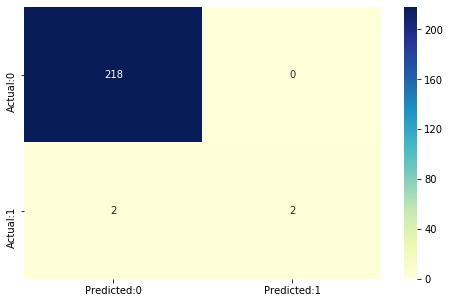

In [504]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)
smote = LogisticRegression(solver='liblinear').fit(x_train, y_train)

smote_pred = smote.predict(x_test)

# Checking accuracy
print(sklearn.metrics.accuracy_score(y_test, smote_pred))

# f1 score
print(sklearn.metrics.f1_score(y_test, smote_pred))

print(sklearn.metrics.recall_score(y_test, smote_pred))
print(sklearn.metrics.precision_score(y_test,smote_pred))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,smote_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [654]:
# answer_pred=smote.predict(clean_df)
# print(answer_pred)

threshold = 0.4

predicted_proba = rfc.predict_proba(clean_df)
answer_pred = (predicted_proba [:,1] >= threshold).astype('int')
print(answer_pred)

answer_pred = pd.DataFrame(answer_pred,
            columns=['set_clicked'])
print(answer_pred['set_clicked'].value_counts())
dd = test[test['algorithm_class']== 'stereotype'][['recommendation_set_id']].reset_index(drop=True)
print(dd)
result4 = pd.concat([dd, answer_pred], axis=1)
# result.dropna(inplace=True)
print(result4.describe())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
0    234
1      1
Name: set_clicked, dtype: int64
     recommendation_set_id
0                  47517.0
1                  49712.0
2                  64077.0
3                  66547.0
4                  71284.0
5                  72076.0
6                  76038.0
7                  76395.0
8                  77433.0
9                  77976.0
10                 78359.0
11                 78783.0
12                 78982.0
13                 84027.0
14                 85162.0
15                 85816.0
16           

           query_identifier  query_word_count  query_char_count  \
69762  Withheld for privacy              11.0              71.0   
69789  Withheld for privacy              11.0              73.0   
69857  Withheld for privacy               8.0              43.0   
69883  Withheld for privacy               2.0              15.0   
69935  Withheld for privacy               3.0              29.0   

      query_detected_language  organization_id application_type  \
69762                      en                1  digital_library   
69789                      en                1  digital_library   
69857                      en                1  digital_library   
69883                      fr                1  digital_library   
69935                      en                1  digital_library   

                  item_type  hour_request_received country_by_ip  \
69762  academic_publication                   15.0            DE   
69789  academic_publication                   15.0        

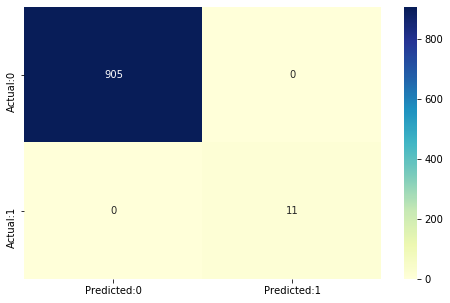

In [655]:
df5=  df5[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract','app_lang','app_version',
                'num_pubs_by_first_author','first_author_id','number_of_authors',
                'clicks','ctr','set_clicked']]
test_df5=  test_df5[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract','app_lang','app_version',
                'num_pubs_by_first_author','first_author_id','number_of_authors']]

print(df5.head())

def featureEngineering(newdf):
    clean_df = newdf.copy()
    clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
#     clean_df['cbf_parser'].fillna('unknown', inplace=True)
#     clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
    clean_df['app_version'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_version'].isnull()]
    clean_df['number_of_authors'].fillna('unknown', inplace=True)
    clean_df['first_author_id'].fillna('unknown', inplace=True)
    clean_df['num_pubs_by_first_author'].fillna('unknown', inplace=True)

    # Target Encoding
    clean_df['query_identifier'] = clean_df['query_identifier'].map(clean_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(clean_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(clean_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(clean_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(clean_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(clean_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(clean_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(clean_df.groupby('application_type')['set_clicked'].mean())
    clean_df['algorithm_class'] = clean_df['algorithm_class'].map(clean_df.groupby('algorithm_class')['set_clicked'].mean())
#     clean_df['cbf_parser'] = clean_df['cbf_parser'].map(clean_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(clean_df.groupby('app_lang')['set_clicked'].mean())
    clean_df['app_version'] = clean_df['app_version'].map(clean_df.groupby('app_version')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(clean_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
    clean_df['organization_id'] = clean_df['organization_id'].map(clean_df.groupby('organization_id')['set_clicked'].mean())
    clean_df['number_of_authors'] = clean_df['number_of_authors'].map(clean_df.groupby('number_of_authors')['set_clicked'].mean())
    clean_df['first_author_id'] = clean_df['first_author_id'].map(clean_df.groupby('first_author_id')['set_clicked'].mean())
    clean_df['num_pubs_by_first_author'] = clean_df['num_pubs_by_first_author'].map(clean_df.groupby('num_pubs_by_first_author')['set_clicked'].mean())
#     print(clean_df.head())
    return clean_df


import sklearn
x=df5.copy()
y=df5.iloc[:,-1].copy()
# print(x.head())
print(len(y))

from sklearn.model_selection import train_test_split
# x_0 = df5[df5['set_clicked']==0]
# print(len(x_0))
# y_0 = x_0.iloc[:,-1]
# print(len(y_0))
# x_1 = df5[df5['set_clicked']==1]
# y_1 = x_1.iloc[:,-1]

# x_train_0,x_test_0,y_train_0,y_test_0=train_test_split(x_0,y_0,test_size=.20,random_state=5)
# x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=.20,random_state=5)
# x_train = pd.concat([x_train_0,x_train_1])
# x_test = pd.concat([x_test_0,x_test_1])
# y_train = pd.concat([y_train_0,y_train_1])
# y_test = pd.concat([y_test_0,y_test_1])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5,stratify=y)

x_train_original = x_train.copy()
print(x_train_original.head())
x_train = featureEngineering(x_train).iloc[:,:-3]
x_test = featureEngineering(x_test).iloc[:,:-3]
print(x_train_original.head())
print(len(x_train))
print(len(y_train))
# print(x_train['query_identifi

from sklearn.ensemble import RandomForestClassifier

# # train model
rfc = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)

print(sklearn.metrics.accuracy_score(y_test, rfc_pred))

print(sklearn.metrics.f1_score(y_test, rfc_pred))

print(sklearn.metrics.recall_score(y_test, rfc_pred))

print(sklearn.metrics.precision_score(y_test, rfc_pred))


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rfc_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# from sklearn.utils import resample
# X = pd.concat([x_train, y_train], axis=1)
# print(X.head())
# # separate minority and majority classes
# x_0 = X[X['set_clicked']==0]
# x_1 = X[X['set_clicked']==1]

# # upsample minority
# # x_1_upsampled = resample(x_1,
# #                           replace=True, # sample with replacement
# #                           n_samples=len(x_0), # match number in majority class
# #                           random_state=27) # reproducible results

# x_0_downsampled = resample(x_0,
#                                 replace = False, # sample without replacement
#                                 n_samples = len(x_1), # match minority n
#                                 random_state = 27) # reproducible results

# # combine majority and upsampled minority
# # upsampled = pd.concat([x_0, x_1_upsampled])

# downsampled = pd.concat([x_0_downsampled, x_1])

# # check new class counts
# print(downsampled['set_clicked'].value_counts())
# # print(upsampled['set_clicked'].value_counts())
# # print(upsampled.head())

# # y_train = upsampled.iloc[:,-1]
# # x_train = upsampled.iloc[:,:-1]

# y_train = downsampled.iloc[:,-1]
# x_train = downsampled.iloc[:,:-1]

# print(x_train.head())


# from sklearn.linear_model import LogisticRegression
# # print(np.isfinite(x_test).sum())
# logreg=LogisticRegression()
# logreg.fit(x_train,y_train)
# y_pred=logreg.predict(x_test)
# # print(x_test)

# print(sklearn.metrics.accuracy_score(y_test,y_pred))
# print(sklearn.metrics.f1_score(y_test,y_pred))
# print(sklearn.metrics.recall_score(y_test,y_pred))
# print(sklearn.metrics.precision_score(y_test,y_pred))

# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


In [656]:
pred_proba_df = pd.DataFrame(rfc.predict_proba(x_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = sklearn.metrics.f1_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.7586206896551725
[[898   7]
 [  0  11]]

******** For i = 0.1 ******
Our testing accuracy is 1.0
[[905   0]
 [  0  11]]

******** For i = 0.15 ******
Our testing accuracy is 1.0
[[905   0]
 [  0  11]]

******** For i = 0.2 ******
Our testing accuracy is 1.0
[[905   0]
 [  0  11]]

******** For i = 0.25 ******
Our testing accuracy is 1.0
[[905   0]
 [  0  11]]

******** For i = 0.3 ******
Our testing accuracy is 1.0
[[905   0]
 [  0  11]]

******** For i = 0.35 ******
Our testing accuracy is 1.0
[[905   0]
 [  0  11]]

******** For i = 0.4 ******
Our testing accuracy is 1.0
[[905   0]
 [  0  11]]

******** For i = 0.45 ******
Our testing accuracy is 1.0
[[905   0]
 [  0  11]]

******** For i = 0.5 ******
Our testing accuracy is 1.0
[[905   0]
 [  0  11]]

******** For i = 0.55 ******
Our testing accuracy is 1.0
[[905   0]
 [  0  11]]

******** For i = 0.6 ******
Our testing accuracy is 1.0
[[905   0]
 [  0  11]]

******** For i = 0

In [657]:

clean_df = test_df5.copy()
print(clean_df['query_word_count'].unique())
print(x_train_original['query_word_count'].unique())

def featureEngineering(newdf):
    train_df = x_train_original.copy()
    clean_df = newdf.copy()
    clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
#     clean_df['cbf_parser'].fillna('unknown', inplace=True)
#     clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
    clean_df['app_version'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_version'].isnull()]
    clean_df['number_of_authors'].fillna('unknown', inplace=True)
    clean_df['first_author_id'].fillna('unknown', inplace=True)
    clean_df['num_pubs_by_first_author'].fillna('unknown', inplace=True)

    # Target Encoding
    clean_df['query_identifier'] = clean_df['query_identifier'].map(train_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(train_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(train_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(train_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(train_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(train_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(train_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(train_df.groupby('application_type')['set_clicked'].mean())
    clean_df['algorithm_class'] = clean_df['algorithm_class'].map(train_df.groupby('algorithm_class')['set_clicked'].mean())
#     clean_df['cbf_parser'] = clean_df['cbf_parser'].map(train_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(train_df.groupby('app_lang')['set_clicked'].mean())
    clean_df['app_version'] = clean_df['app_version'].map(train_df.groupby('app_version')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(train_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
    clean_df['organization_id'] = clean_df['organization_id'].map(train_df.groupby('organization_id')['set_clicked'].mean())
#     print(clean_df.head())
    clean_df['number_of_authors'] = clean_df['number_of_authors'].map(train_df.groupby('number_of_authors')['set_clicked'].mean())
    clean_df['first_author_id'] = clean_df['first_author_id'].map(train_df.groupby('first_author_id')['set_clicked'].mean())
    clean_df['num_pubs_by_first_author'] = clean_df['num_pubs_by_first_author'].map(train_df.groupby('num_pubs_by_first_author')['set_clicked'].mean())

    clean_df.fillna(clean_df.mean(),inplace=True)
    return clean_df

clean_df = featureEngineering(clean_df)

print(clean_df)


# answer_pred=rfc.predict(clean_df)
# print(answer_pred)
threshold = 0.4

predicted_proba = rfc.predict_proba(clean_df)
answer_pred = (predicted_proba [:,1] >= threshold).astype('int')
print(answer_pred)

answer_pred = pd.DataFrame(answer_pred,
            columns=['set_clicked'])
print(answer_pred['set_clicked'].value_counts())
dd = test[test['algorithm_class']== 'same_author'][['recommendation_set_id']].reset_index(drop=True)
print(dd)
result5 = pd.concat([dd, answer_pred], axis=1)
# result.dropna(inplace=True)
print(result5.describe())


[ 6. 10.  9.  8. 12. 18. 16. 11.  5.  3.  7. 14. 17.  4. 24. 15. 13. 23.
  1. 22.  2.]
[ 4. 11. 20.  2.  6. 12. 10.  5.  8.  7. 22.  9. 17.  1. 15. 14. 16.  3.
 13. 19. 26. 24. 18. 21. 27. 23. 25. 40. 37.]
      query_identifier  query_word_count  query_char_count  \
1430          0.012302          0.022727          0.021277   
1433          0.012302          0.022727          0.040000   
1471          0.012302          0.007547          0.021277   
1564          0.012302          0.010204          0.024390   
1603          0.012302          0.007547          0.000000   
1663          0.012302          0.010204          0.000000   
1678          0.012302          0.013761          0.000000   
1700          0.012302          0.032258          0.000000   
1716          0.012302          0.010204          0.000000   
1746          0.012302          0.007547          0.023256   
1815          0.012302          0.000000          0.000000   
1826          0.012302          0.022727          

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
0    77
Name: set_clicked, dtype: int64
    recommendation_set_id
0                122243.0
1                122437.0
2                124453.0
3                128997.0
4                131437.0
5                134930.0
6                135580.0
7                137105.0
8                137898.0
9                142022.0
10               151112.0
11               151992.0
12               152182.0
13               152338.0
14               152775.0
15               154655.0
16               155883.0
17               159407.0
18               159569.0
19               159968.0
20               163172.0
21               164308.0
22               165796.0
23               172333.0
24               173777.0
25               175567.0
26               178812.0
27               182192.0
28               185383.0
29               18803

           query_identifier  query_word_count  query_char_count  \
23701  Withheld for privacy              10.0              78.0   
25740  Withheld for privacy               7.0              55.0   
25820  Withheld for privacy               9.0              79.0   
26150  Withheld for privacy               1.0               3.0   
26465  Withheld for privacy               9.0              70.0   

      query_detected_language  organization_id application_type  \
23701                      en                1  digital_library   
25740                      en                1  digital_library   
25820                      en                1  digital_library   
26150                      es                1  digital_library   
26465                      en                1  digital_library   

                  item_type  hour_request_received country_by_ip  \
23701  academic_publication                   18.0            IT   
25740  academic_publication                   16.0        

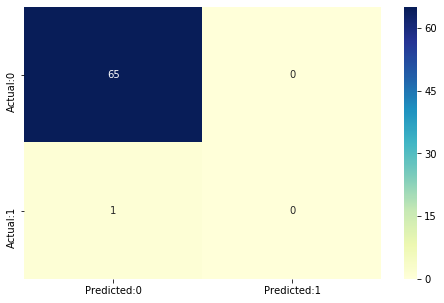

In [406]:
df6=  df6[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract','app_lang','app_version',
                'clicks','ctr','set_clicked']]
test_df6=  test_df6[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract','app_lang','app_version']]

print(df6.head())

def featureEngineering(newdf):
    clean_df = newdf.copy()
    clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
#     clean_df['cbf_parser'].fillna('unknown', inplace=True)
#     clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
    clean_df['app_version'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_version'].isnull()]
   

    # Target Encoding
    clean_df['query_identifier'] = clean_df['query_identifier'].map(clean_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(clean_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(clean_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(clean_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(clean_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(clean_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(clean_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(clean_df.groupby('application_type')['set_clicked'].mean())
    clean_df['algorithm_class'] = clean_df['algorithm_class'].map(clean_df.groupby('algorithm_class')['set_clicked'].mean())
#     clean_df['cbf_parser'] = clean_df['cbf_parser'].map(clean_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(clean_df.groupby('app_lang')['set_clicked'].mean())
    clean_df['app_version'] = clean_df['app_version'].map(clean_df.groupby('app_version')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(clean_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
    clean_df['organization_id'] = clean_df['organization_id'].map(clean_df.groupby('organization_id')['set_clicked'].mean())
    
#     print(clean_df.head())
    return clean_df


import sklearn
x=df6.copy()
y=df6.iloc[:,-1].copy()
# print(x.head())
print(len(y))

from sklearn.model_selection import train_test_split
x_0 = df6[df6['set_clicked']==0]
print(len(x_0))
y_0 = x_0.iloc[:,-1]
print(len(y_0))
x_1 = df6[df6['set_clicked']==1]
y_1 = x_1.iloc[:,-1]

x_train_0,x_test_0,y_train_0,y_test_0=train_test_split(x_0,y_0,test_size=.20,random_state=5)
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=.20,random_state=5)
x_train = pd.concat([x_train_0,x_train_1])
x_test = pd.concat([x_test_0,x_test_1])
y_train = pd.concat([y_train_0,y_train_1])
y_test = pd.concat([y_test_0,y_test_1])

x_train_original = x_train.copy()
print(x_train_original.head())
x_train = featureEngineering(x_train).iloc[:,:-3]
x_test = featureEngineering(x_test).iloc[:,:-3]
print(x_train_original.head())
print(len(x_train))
print(len(y_train))
# print(x_train['query_identifi

from sklearn.ensemble import RandomForestClassifier

# # train model
rfc = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)

print(sklearn.metrics.accuracy_score(y_test, rfc_pred))

print(sklearn.metrics.f1_score(y_test, rfc_pred))

print(sklearn.metrics.recall_score(y_test, rfc_pred))

print(sklearn.metrics.precision_score(y_test, rfc_pred))


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rfc_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# from sklearn.utils import resample
# X = pd.concat([x_train, y_train], axis=1)
# print(X.head())
# # separate minority and majority classes
# x_0 = X[X['set_clicked']==0]
# x_1 = X[X['set_clicked']==1]

# # upsample minority
# # x_1_upsampled = resample(x_1,
# #                           replace=True, # sample with replacement
# #                           n_samples=len(x_0), # match number in majority class
# #                           random_state=27) # reproducible results

# x_0_downsampled = resample(x_0,
#                                 replace = False, # sample without replacement
#                                 n_samples = len(x_1), # match minority n
#                                 random_state = 27) # reproducible results

# # combine majority and upsampled minority
# # upsampled = pd.concat([x_0, x_1_upsampled])

# downsampled = pd.concat([x_0_downsampled, x_1])

# # check new class counts
# print(downsampled['set_clicked'].value_counts())
# # print(upsampled['set_clicked'].value_counts())
# # print(upsampled.head())

# # y_train = upsampled.iloc[:,-1]
# # x_train = upsampled.iloc[:,:-1]

# y_train = downsampled.iloc[:,-1]
# x_train = downsampled.iloc[:,:-1]

# print(x_train.head())


# from sklearn.linear_model import LogisticRegression
# # print(np.isfinite(x_test).sum())
# logreg=LogisticRegression()
# logreg.fit(x_train,y_train)
# y_pred=logreg.predict(x_test)
# # print(x_test)

# print(sklearn.metrics.accuracy_score(y_test,y_pred))
# print(sklearn.metrics.f1_score(y_test,y_pred))
# print(sklearn.metrics.recall_score(y_test,y_pred))
# print(sklearn.metrics.precision_score(y_test,y_pred))

# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


In [407]:

clean_df = test_df6.copy()
# clean_df
print(clean_df['query_word_count'].unique())
print(x_train_original['query_word_count'].unique())

def featureEngineering(newdf):
    train_df = x_train_original.copy()
    clean_df = newdf.copy()
    clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
#     clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
#     clean_df['cbf_parser'].fillna('unknown', inplace=True)
#     clean_df[clean_df['cbf_parser'].isnull()]
    clean_df['app_lang'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_lang'].isnull()]
    clean_df['app_version'].fillna('unknown', inplace=True)
    clean_df[clean_df['app_version'].isnull()]

    # Target Encoding
    clean_df['query_identifier'] = clean_df['query_identifier'].map(train_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(train_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(train_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(train_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(train_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(train_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(train_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(train_df.groupby('application_type')['set_clicked'].mean())
    clean_df['algorithm_class'] = clean_df['algorithm_class'].map(train_df.groupby('algorithm_class')['set_clicked'].mean())
#     clean_df['cbf_parser'] = clean_df['cbf_parser'].map(train_df.groupby('cbf_parser')['set_clicked'].mean())
    clean_df['app_lang'] = clean_df['app_lang'].map(train_df.groupby('app_lang')['set_clicked'].mean())
    clean_df['app_version'] = clean_df['app_version'].map(train_df.groupby('app_version')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(train_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
    clean_df['organization_id'] = clean_df['organization_id'].map(train_df.groupby('organization_id')['set_clicked'].mean())
#     print(clean_df.head())

    clean_df.fillna(clean_df.mean(),inplace=True)
    return clean_df

clean_df = featureEngineering(clean_df)

print(clean_df)


answer_pred=rfc.predict(clean_df)
print(answer_pred)
answer_pred = pd.DataFrame(answer_pred,
            columns=['set_clicked'])
print(answer_pred['set_clicked'].value_counts())
dd = test[test['algorithm_class']== 'random'][['recommendation_set_id']].reset_index(drop=True)
print(dd)
result6 = pd.concat([dd, answer_pred], axis=1)
# result.dropna(inplace=True)
print(result6.describe())


[11.  5. 16.  4.  1.  9.]
[ 1. 12. 11.  6.  7. 10.  9.  5.  8.  4.  3. 15. 14.  0. 16. 20. 13.  2.
 22. 17. 19. 28. 23.]
     query_identifier  query_word_count  query_char_count  \
714          0.003876          0.000000               0.0   
746          0.003876          0.000000               0.0   
771          0.003876          0.000000               0.0   
811          0.003876          0.076923               0.0   
813          0.003876          0.000000               0.0   
860          0.003876          0.000000               0.0   

     query_detected_language  organization_id  application_type  item_type  \
714                 0.000000         0.003876          0.003876   0.003876   
746                 0.000000         0.003876          0.003876   0.003876   
771                 0.000000         0.003876          0.003876   0.003876   
811                 0.000000         0.003876          0.003876   0.003876   
813                 0.038462         0.003876          0.0038

In [658]:
# final_result = pd.concat([result1.dropna(),result2.dropna(),result3.dropna(),result4.dropna(),result5.dropna(),result6.dropna()],axis=0)
# final_result.info()

# print(result1.info())
# print(result2.info())
# print(result3.info())
# print(result4.info())
# print(result5.info())
# print(result6.info())

f= pd.concat([result1,result2,result3,result4,result5,result6])
# print(f)

f['recommendation_set_id'] = f['recommendation_set_id'].astype(int)
print(f.dtypes)
f.sort_values("recommendation_set_id", inplace=True, ascending=False)
f.head()
f.to_csv('submission-algo-wise file3.csv', encoding='utf-8', index=False)
f['set_clicked'].value_counts()
# print(f.head())
# print(f['set_clicked'].value_counts())

recommendation_set_id    int32
set_clicked              int64
dtype: object


0    8957
1     188
Name: set_clicked, dtype: int64

In [257]:

# sampl = pd.read_csv('tcdml1920-rec-click-pred--submission file (example).csv')
# f = f.reindex(index=sampl['recommendation_set_id'])
# f = f.reset_index()
# print(f.head())

ValueError: cannot reindex from a duplicate axis